
## iris flower classification




In [75]:
import pandas as pd
import numpy as np

In [76]:
#Load Dataset
data=pd.read_csv("iris.csv")

In [77]:
data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [78]:
data.size


900

In [79]:
data.shape


(150, 6)

In [80]:
data.tail()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [81]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [82]:
data.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [83]:
data.isnull().sum()


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [84]:
data["Species"].value_counts()


,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


<ipython-input-85-ea30489e1db4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Species'], y=data['SepalLengthCm'], palette=['blue', 'yellow', 'green'])


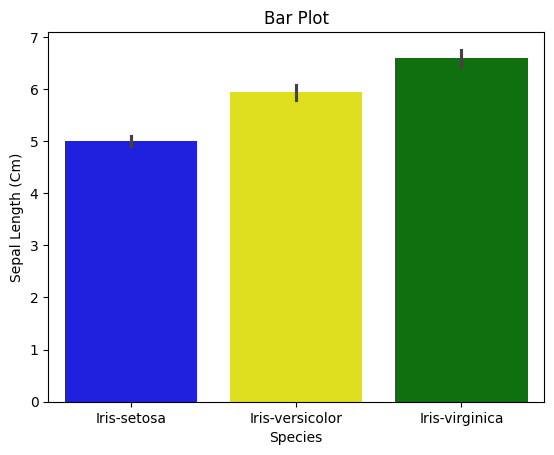

In [85]:
#Plotting of setosa ,versicolor and virginica distribution

sns.barplot(x=data['Species'], y=data['SepalLengthCm'], palette=['blue', 'yellow', 'green'])
plt.title("Bar Plot")
plt.xlabel("Species")
plt.ylabel("Sepal Length (Cm)")
plt.show()

In [86]:
#convert Species into numerical values

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


<Axes: >

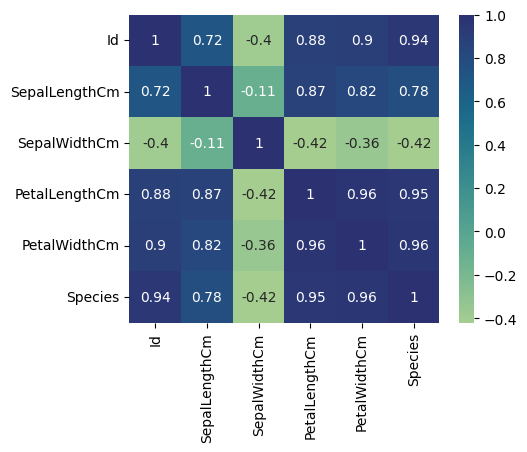

In [87]:
corr=data.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='crest')

In [88]:
# Model Building

from sklearn.model_selection import train_test_split
x=data.drop(columns=['Species'])
y=data['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=1)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [90]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(x_train,y_train)
y_pred_log_reg = log_reg.predict(x_test)
log_reg_accuracy = log_reg.score(x_test, y_test)
print("Accuracy of Logistic Regression: ", log_reg_accuracy*100)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_log_reg))

Accuracy of Logistic Regression:  88.88888888888889
[[14  0  0]
 [ 0 13  5]
 [ 0  0 13]]


In [91]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
rf_accuracy=rf.score(x_test, y_test)
print("Accuracy of Random Forest:",rf_accuracy*100)
print(confusion_matrix(y_test,y_pred_rf))

Accuracy of Random Forest: 100.0
[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]


In [92]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)
y_pred_dec_tree=dec_tree.predict(x_test)
dec_tree_accuracy = dec_tree.score(x_test,y_test)
print("Accuracy of Decision Tree: ", dec_tree_accuracy*100)
print(confusion_matrix(y_test,y_pred_dec_tree))

Accuracy of Decision Tree:  97.77777777777777
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


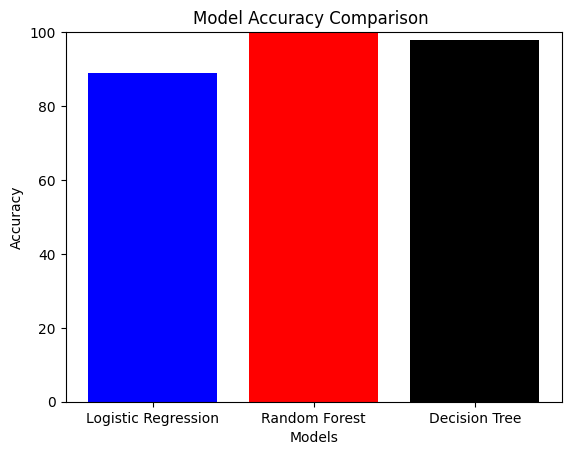

In [93]:
# Model Comparison

models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [log_reg_accuracy*100, rf_accuracy*100, dec_tree_accuracy*100]
colors = ['blue', 'red', 'black']
plt.bar(models, accuracies,color=colors)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison ")
plt.ylim([0, 100])
plt.show()